<h1><center>The impacts of environmental variability on within-host parasite diversity</center></h1>

<h2><center>CSB1021: Introduction to Python, Final Project</center></h2>

<h3><center>Due: 10 March 2022</center></h3>
<h3><center>Madeline Jarvis-Cross, 1001458488 🤠</center></h3>

# **Introduction**

## Conceptual Background

In 2019, SARS-CoV-2 spilled into the human population, sparking a global pandemic from which we’ve yet to emerge. Worryingly, SARS-CoV-2 is not the first zoonotic disease we’ve encountered, nor is it predicted to be the last ([Jones et al. 2008](https://www.nature.com/articles/nature06536); [Brulliard, 2020](https://www.washingtonpost.com/science/2020/04/03/coronavirus-wildlife-environment/)). At the between-host level, we know that climate and land-use change can facilitate novel species interactions and increase contact rates between wild populations and humans, enabling zoonotic spillover events and disease emergence ([Daszak et al. 2000](https://science.sciencemag.org/content/287/5452/443.abstract); [Daszak et al. 2001](https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.461.1781&rep=rep1&type=pdf); [Patz et al. 2004](https://ehp.niehs.nih.gov/doi/full/10.1289/ehp.6877); [Plowright et al. 2017](https://www.nature.com/articles/nrmicro.2017.45?report=reader); [Plowright et al. 2020](https://ecoevorxiv.org/cru9w)). Less studied are the mechanisms that promote parasite diversity and allow parasites to circulate within hosts, creating kindling for the spillover events we observe among hosts. Separately, community ecologists have theorized that an intermediate level of disturbance may promote species coexistence by precluding the competitive advantages allowed by low levels of disturbance, and the extinction risks brought on by high levels of disturbance ([Connell 1978](https://www.science.org/doi/abs/10.1126/science.199.4335.1302)).    

If we think about environmental variability as a sustained, or “press”, disturbance, there arise two separate but related ways to consider the effects of environmental variability on parasite diversity within hosts. First, we may consider rising environmental variability as an consequence of climate change. While much attention has been paid to the effects of rising temperatures on disease systems, we’ve invested far less in exploring the effects of rising temperature variability, despite evidence of its outsized impacts on species outcomes ([Dobson and Carpenter 1992](http://www.ciesin.org/docs/001-364/001-364.html); [Lafferty 2009](https://esajournals.onlinelibrary.wiley.com/doi/abs/10.1890/08-0079.1); [Vasseur et al. 2014](https://royalsocietypublishing.org/doi/full/10.1098/rspb.2013.2612)). In ectothermic hosts, increasingly erratic external conditions will affect the internal conditions of the host, thereby also affecting any parasites the host may harbour. Second, we may consider environmental variability as a physiological trait. Bats (order Chiroptera) have long been acknowledged as prolific reservoirs for disease and implicated in zoonotic spillover events ([Calisher et al. 2006](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1539106/); [Brook and Dobson 2015](https://www.sciencedirect.com/science/article/pii/S0966842X14002480?casa_token=DbrKQUEEi00AAAAA:8RajgXtME2Uc3KP67wXNczRV70897WrfxnNAdAmtj9w4Mk3z8yjRLcazOLVNA6gsWW08sJ-0aVE); [Irving et al. 2021](https://www.nature.com/articles/s41586-020-03128-0)). Bats are also somewhat unique in their ability to vary their internal temperature according to their activity level ([Fumagalli et al. 2021](https://royalsocietypublishing.org/doi/10.1098/rsif.2021.0211)). It has been theorized that these variations in internal temperatures may aid in bats’ immune responses, allowing them to carry microparasites without suffering outsized morbidity (Fumagalli et al. 2021; [Luo et al. 2021](https://animalbiotelemetry.biomedcentral.com/articles/10.1186/s40317-021-00268-6)). Extending on that idea, we became interested in how variation in internal temperature may contribute to bats’ propensity to support diverse communities of parasites.  

Here, we aim to investigate the impacts of environmental variability on the viability and maintenance of parasite diversity within hosts. We began by modifying [Antia et al.’s (1994)](https://www.journals.uchicago.edu/doi/abs/10.1086/285686) model of within-host population dynamics to include a secondary parasite (see below). We wrote a demographically stochastic version of the model, an environmentally stochastic version of the model wherein each parasite’s growth rate was defined along a thermal performance curve, and a demographically and environmentally stochastic version of the model ([Melbourne and Hastings 2008](https://www.nature.com/articles/nature06922)). We simulated each of these models forward in time, beginning simulations with the primary parasite in the system, and introducing the secondary parasite at different points along the timeseries. We simulated several permutations of the environmentally stochastic versions of the model, altering the frequency and magnitude of thermal disturbance within the system. All our simulations were performed in R.

## For This Project  

**Between and among the deterministic and stochastic simulations of the model, we will compare the ability of the secondary parasite to invade a system containing the primary parasite and the host’s immune system, and the number of time steps for which the primary and secondary parasites co-occurred.**  

To accomplish these goals, we will:  
1. Import our data from .rds files, to pandas data frames.  
    a. Please note that all my data can be found in a Github repo, [here](https://github.com/MadelineJC/CSB1021_FinalProject/tree/main/FinalProj_Data).
2. Explore the data.  
3. Wrangle the data.  
4. Analyse the data.  
5. Visualize the data.  

# **Methods**

## Model Description

### Antia et al.'s (1994) Model of Within-Host Population Dynamics:   
Antia et al.’s (1994) model of within host population dynamics uses a system of ordinary differential equations to represent the interaction between an infecting parasite and its host’s immune system as analogous to the interaction between a prey item and its predator. The model assumes that the growth rate of the host’s immune system is proportional to parasite density at low parasite densities, and saturates at high parasite densities, allowing the host’s immune system to either extirpate or succumb to the infection (Eqns. 1-2) (Antia et al. 1994).  

\begin{align}
    &\frac{dP}{dt} = rP - kPI \text{,  if P < D and P ➝ 0 if P > D}&\\
    &\frac{dI}{dt} = ρI\frac{P}{P + ϕ}&\\
\end{align}  

Where: 

In [185]:
%%html
<style>
table {float:left}
</style>

| Parameters | Values |
| :--- | :--- |
| P, Parasite abundance | NA |  
| I, Host immune cell abundance | NA |
| r, Intrinsic growth rate of parasite | 0.1 - 10.0 |  
| k, Rate of destruction of parasite by host immune system | $10^{-3}$ |
| ρ, Maximum growth rate of the immune system | 1 |
| 𝜙, Parasite density at which growth rate of host immune system is half its maximum | $10^3$ |
| D, Lethal within-host parasite density | $10^9$ |

In the above model, $\frac{dP}{dt}$ and $\frac{dI}{dt}$ represent the changes in parasite and immune cell abundance over time. In (1), the first term denotes the growth of the parasite population, while the second term denotes its destruction by the host’s immune system. In (2), we can see that the host’s immune system will grow in response to the growth of the parasite population, until it hits a saturation point. To investigate the impacts of environmental variability on the viability and maintenance of parasite diversity within hosts, we discretized and modified Antia et al.’s (1994) model to include a secondary parasite, which could indirectly compete with the primary parasite through the host’s immune response (Eqns. 3-5).

### Our Modified Version of Antia et al.'s (1994) Model:  

\begin{align}
    &P_{i[t+1]} = (1 + r⋅ts - (1-e^{-k⋅I_t⋅ts}))P_{i[t]}&\\
    &P_{j[t+1]} = (1 + r⋅ts - (1-e^{-k⋅I_t⋅ts}))P_{j[t]}&\\
    &I_{[t+1]} = (1 + ρ(\frac{P_i}{P_i + ϕ} + \frac{P_j}{P_j + ϕ})ts)I_{[t]}&\\
\end{align}  

Where $P_i$ is our primary parasite, $P_j$ is our secondary parasite, and $I$ is the host's immune system.  

In our simulations, we decreased the range of possible values for  $r_i$ and $r_j$ from 0.1 - 10.0 to 0.1 - 2.0, and increased the rate at which parasites are destroyed by the host’s immune system by a factor of ten (from $10^{-3}$ to $10^{-2}$) to prevent the parasite from killing the host too quickly. Given that we’re interested in the mechanisms that affect parasite co-occurrence and diversity, we wanted to prevent transient infections where possible. To write the demographically stochastic version of this model, we wrote the model’s growth terms as Poisson processes, and the parasite population’s mortality term as a binomial process. To write the environmentally stochastic version of this model, we defined the growth rates of each parasite along thermal performance curves, which were developed in accordance with the Sharpe-Schoolfield model ([Schoolfield et al. 1981](https://www.sciencedirect.com/science/article/pii/0022519381902460)).  

### Thermal Performace Curves

We wrote two sets of four thermal performance curves, representing two thermal environments, and four thermal arrangements per environment. One thermal environment had a lower average temperature, while the second had a higher average temperature, representing the thermal conditions within ectotherms and bats, respectively. Our four thermal arrangements represented how each parasite’s growth rate ($P_i$ and $P_j$, $r_i$ and $r_j$) would respond to the temperature of the system. We wrote our first arrangement such that $r_i$ and $r_j$ would respond identically to the temperature of the system, a second arrangement wherein $r_i$ and $r_j$ would peak on opposite sides of the average temperature of the system, a third arrangement wherein we moved the average temperature of the system to the left to give the first parasite, $P_i$, a thermal advantage, and a fourth arrangement wherein we shifted the average temperature of the system to the right to give $P_j$ a thermal advantage.  

## Model Simulations

Within each of the two thermal environments, and each of the four thermal arrangements, we simulated each of our four models (deterministic, demographically stochastic, environmentally stochastic, and demographically and environmentally stochastic). Within the environmentally stochastic, and demographically and environmentally stochastic model simulations, we included two sets of permutations to alter the ways in which we randomly selected the temperature of the system. The first set of permutations varied the magnitude of thermal disturbance within the system and was applied to the low average temperature thermal environment runs to represent rising environmental variation in our climate, while the second set varied the frequency of thermal disturbance within the system and was applied to the high average temperature thermal environment to represent changes in the internal temperatures of bats. We began each simulation with the primary parasite in the system, and for each of our four model simulations, we permuted the time step at which the secondary parasite, $P_j$, was introduced into the system to determine how environmental variation might affect its ability to invade and co-occur. We ran each permutation of each of our stochastic models one thousand times.  

# <span style='color:Pink'> Now, let's get started! 💻 </span>  
---------------------------------------------------------------

## Two Quick Examples...

### 1. Simulating Time Series Data
Before we get started in ernest, here's an example of how I would have implemented the deterministic version of my model, as a system of ODEs in Python...  

In [186]:
# Oh hey look! It's that bit of code we always start class with to see multi-command outputs!

# Access options from the iPython core
from IPython.core.interactiveshell import InteractiveShell

# Change the value of ast_node_interactivity
InteractiveShell.ast_node_interactivity = "all"

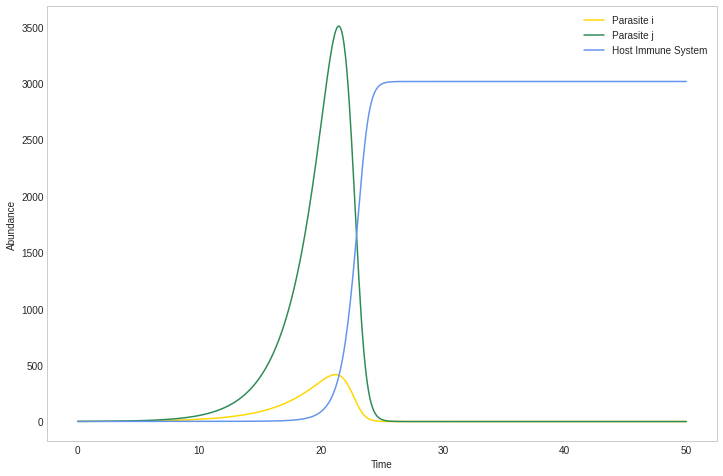

In [187]:
## An example of how I'd use an ODE solver in Python:

# Requisite packages:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Write the function; system of 3 ODEs
def model(x, t):
    ri = 0.3; rj = 0.4; k = 0.001; p = 1; o = 1000
    dPidt = ri*x[0] - k*x[0]*x[2]
    dPjdt = rj*x[1] - k*x[1]*x[2]
    dIdt = p*x[2]*((x[0]/(x[0]+o)) + (x[1]/(x[1]+o)))
    dxdt = [dPidt, dPjdt, dIdt]
    return dxdt

# Initial conditions/initial population abundances
x0 = [1,1,1]

# Time points for which we want solutions; I want 50 time steps, but solitions every 10th of a time step
t = np.linspace(0,50,501)

# Solve ODE; uses an lsoda solver, same as package "deSolve" in R
x = odeint(model,x0,t)

# Plot outputs
plt.plot(t, x[:,0], label = 'Parasite i', color = 'gold')
plt.plot(t, x[:,1], label = 'Parasite j', color = 'seagreen')
plt.plot(t, x[:,2], label = 'Host Immune System', color = 'cornflowerblue')
plt.ylabel('Abundance')
plt.xlabel('Time')
plt.legend(loc = 'best')
plt.grid(False)
plt.show()
plt.rcParams['figure.figsize'] = [12, 8]

# We can take a quick look at the output here...
x[:21,:]; # First 20 time steps, t0 to t2 to make sure everything started out how we intended
x[150:301,:]; # Time steps 150-300 (t15 to t30) to see the middle bit of the run
# I've suppressed the outputs of the above two lines for brevity.

### 2. Getting Co-Occurrence Data from Time Series Data
Now, let's look at a quick example of how I'd get co-occurrence data (a count of how many time steps for which $P_i$ and $P_j$ co-occurred/simultaneously had abundances above 1) out of that time series we just generated...

In [188]:
x2 = x[:,0:2] # Making a subsetted array including only the parasite population abundances.
x3 = np.where((x2>1).all(axis=1)) # Getting all the rows for which Pi and Pj simultaneously had abundances > 1.
x3[-1][-1] # Is the final time step at which Pi and Pj co-occur, meaning they co-occur for 25.1 days.

251

Let's add a vertincal line to denote the last time step at which Pi and Pj co-occur.

Text(0, 0.5, 'Abundance')

Text(0.5, 0, 'Time')

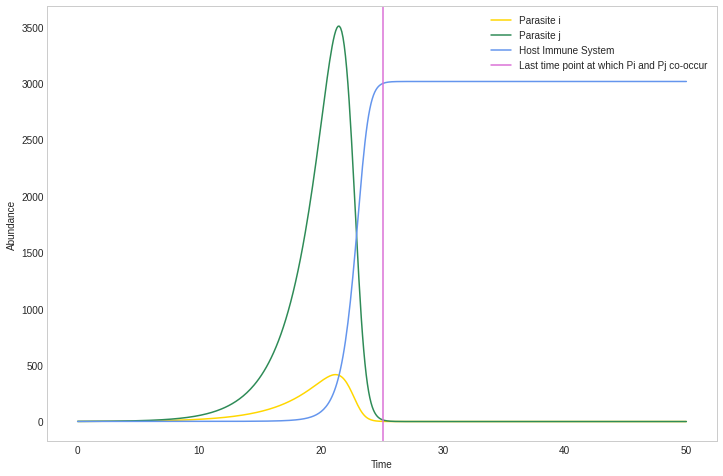

In [189]:
plt.plot(t, x[:,0], label = 'Parasite i', color = 'gold')
plt.plot(t, x[:,1], label = 'Parasite j', color = 'seagreen')
plt.plot(t, x[:,2], label = 'Host Immune System', color = 'cornflowerblue')
plt.axvline(x = 25.1, color = 'orchid', label = 'Last time point at which Pi and Pj co-occur')
plt.ylabel('Abundance')
plt.xlabel('Time')
plt.legend(loc = 'best')
plt.grid(False)
plt.show()
plt.rcParams['figure.figsize'] = [12, 8]

## Okay, examples are done! Back to our regularly scheduled programming...

## Importing and Exploring the Data  

After performing all our simulations in R, we saved our outputs first as data frames, then as .rds files. To import our data into Python, we'll using **rpy2**. According to the rpy2 [Github repository](https://rpy2.github.io/doc/v3.4.x/html/index.html), rpy2 is an interface to R running embedded in a Python process. rpy2 also includes functionality to deal with pandas DataFrames.  

In [190]:
# Importing pandas so I can work with these data frames, and installing and importing rpy2, so I can import my data, as stored in .rds files.
import pandas as pd

import sys
!{sys.executable} -m pip install rpy2
import rpy2
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
pandas2ri.activate()
rpy2.__version__ # Had to check version because implementation was recently changed
readRDS = robjects.r['readRDS']

'3.4.5'

In [191]:
# Importing some data as a test
df = readRDS('FinalProj_Data/LowTemp_SD10/Det_Iden_LTLO.rds')
df

df2 = readRDS('FinalProj_Data/LowTemp_SD10/DemPV_I_LTLO.rds')
df2.head(n = 20) # Let's check out the first 20 columns; Does this look right? Yes!
df2.info()

df2.iloc[:,0] # Let's take a look at the first column!

array([84, 78, 73, 67, 63, 57, 49, 38, 24,  7,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int32)

,Intro_0,Intro_1,Intro_2,Intro_3,Intro_4,Intro_5,Intro_6,Intro_7,Intro_8,Intro_9,...,Intro_40,Intro_41,Intro_42,Intro_43,Intro_44,Intro_45,Intro_46,Intro_47,Intro_48,Intro_49
1,84,91,64,78,72,55,63,55,34,0,...,0,0,0,0,0,0,0,0,0,0
2,74,80,75,72,61,66,0,19,0,30,...,0,0,0,0,0,0,0,0,0,0
3,77,65,81,71,67,56,51,28,49,0,...,0,0,0,0,0,0,0,0,0,0
4,87,79,66,61,59,65,51,23,21,6,...,0,0,0,0,0,0,0,0,0,0
5,81,74,72,65,63,65,50,0,30,0,...,0,0,0,0,0,0,0,0,0,0
6,81,73,76,72,68,57,57,0,18,10,...,0,0,0,0,0,0,0,0,0,0
7,83,88,72,60,66,56,0,57,14,15,...,0,0,0,0,0,0,0,0,0,0
8,70,87,80,112,77,61,46,29,10,0,...,0,0,0,0,0,0,0,0,0,0
9,89,82,75,69,51,47,44,31,21,29,...,0,0,0,0,0,0,0,0,0,0
10,78,97,60,75,54,54,37,11,0,11,...,0,0,0,0,0,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 50 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Intro_0   1000 non-null   int32
 1   Intro_1   1000 non-null   int32
 2   Intro_2   1000 non-null   int32
 3   Intro_3   1000 non-null   int32
 4   Intro_4   1000 non-null   int32
 5   Intro_5   1000 non-null   int32
 6   Intro_6   1000 non-null   int32
 7   Intro_7   1000 non-null   int32
 8   Intro_8   1000 non-null   int32
 9   Intro_9   1000 non-null   int32
 10  Intro_10  1000 non-null   int32
 11  Intro_11  1000 non-null   int32
 12  Intro_12  1000 non-null   int32
 13  Intro_13  1000 non-null   int32
 14  Intro_14  1000 non-null   int32
 15  Intro_15  1000 non-null   int32
 16  Intro_16  1000 non-null   int32
 17  Intro_17  1000 non-null   int32
 18  Intro_18  1000 non-null   int32
 19  Intro_19  1000 non-null   int32
 20  Intro_20  1000 non-null   int32
 21  Intro_21  1000 non-null   int32
 22  Intro

1       84
2       74
3       77
4       87
5       81
        ..
996     67
997     80
998     81
999     81
1000    85
Name: Intro_0, Length: 1000, dtype: int32

These data show co-occurrence times between our infecting parasites, $P_i$ and $P_j$. The columns denote the day on which the secondary parasite, $P_j$, was introduced to the system, while the rows denote the simulation number, out of 1000, within which the period of co-occurrence took place. For example, the value in the first column of the first row says that in our first simulation out of 1000 for which $P_i$ and $P_j$ were introduced at the same time (Intro_0), $P_i$ and $P_j$ co-occurred for 84 time steps, or 8.4 days. Our first test case, df, shows periods of co-occurrence in our deterministic model, while df2 shows periods of co-occurence over 1000 stochastic simulations of our demographically stochastic model. In df2, we may observe the average period of co-occurrence per introduction point by averaging each column. We may also see that when $P_j$ is introduced later, periods of co-occurrence tend to be shorter. Let's evaluate those claims with our test case, df2, before importing the rest of our data. 

In [192]:
ColumnMeans = df2.mean(); ColumnMedians = df2.median()
ColumnMeans[0:11]; ColumnMedians[0:11]

Intro_0     80.857
Intro_1     78.734
Intro_2     73.861
Intro_3     68.014
Intro_4     62.594
Intro_5     55.872
Intro_6     45.752
Intro_7     34.197
Intro_8     22.100
Intro_9     11.900
Intro_10     5.191
dtype: float64

Intro_0     81.0
Intro_1     79.0
Intro_2     74.0
Intro_3     68.0
Intro_4     63.0
Intro_5     57.0
Intro_6     50.0
Intro_7     38.0
Intro_8     23.0
Intro_9      6.0
Intro_10     0.0
dtype: float64

Let's make a quick plot to compare the periods of co-occurrence generated by our deterministic model to the average and median periods of co-occurrence generated by our demographically stochastic model!

Text(0.5, 0, 'Day on Which Pj Introduced')

Text(0, 0.5, 'Time Points for Which Pi and Pj Co-Occurred')

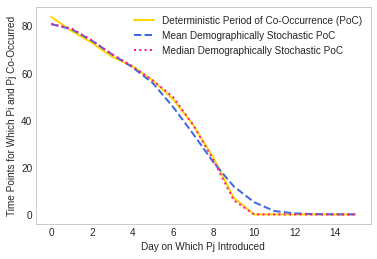

In [193]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

# I'm only plotting the first 15 values because after the 12th introduction point or so, we don't see co-occurrence, so the plot becomes uninformative.
Det = np.array(df[0:16]); DemMeans = np.array(ColumnMeans[0:16]); DemMedians = np.array(ColumnMedians[0:16])

plt.plot(Det, linewidth = 2, color = 'gold')
plt.plot(DemMeans, linewidth = 2, linestyle = 'dashed', color = 'royalblue')
plt.plot(DemMedians, linewidth = 2, linestyle = 'dotted', color = 'deeppink')
plt.xlabel('Day on Which Pj Introduced')
plt.ylabel('Time Points for Which Pi and Pj Co-Occurred')
plt.grid(False)
plt.legend(['Deterministic Period of Co-Occurrence (PoC)','Mean Demographically Stochastic PoC', 'Median Demographically Stochastic PoC'], loc = 1)
plt.rcParams['figure.figsize'] = [12, 8]

As we can see on our plot, demographic stochasticity seems to have an insignificant impact on parasite co-occurrence within hosts. Now, let's import the rest of our data, and take a look at the impact of environmental variability!

In [194]:
# Let's get our paths in order... 
import os
os.chdir('/home/jovyan/2022-01-IntroPython')
os.getcwd()

'/home/jovyan/2022-01-IntroPython'

We want to know what our working directory is so we can write our pathnames correctly.  

Additionally, if we divorce our pathnames from our device, we can make our work easier to write out, and much easier to reproduce.  

In the cell below, I change working directories to import data so I don't have to write out a full pathname like 20 times. There are better ways to do this, and generally, it's not a good idea to mess around with your working directory, but this was the easiest way to accomplish the task after messing around with [**pyprojroot**](https://github.com/chendaniely/pyprojroot) to no avail. **pyprojroot** is supposed to work similarly to R's **here** package, which enables easy file referencing in project-oriented workflows to remove problematic path dependencies. 

In [195]:
# Okay, now that we (sort of) know what we're doing with rpy2, let's import all our data!
# If I'd planned better, I could have named these in a way conducive to importing in a for loop, but alas...

os.chdir('/home/jovyan/2022-01-IntroPython/FinalProj_Data/LowTemp_SD10') # Now that I've changed the wd to the folder where all my .rds files are, I can import them using just their file names.
## Low av. temp
L_I_Det = readRDS('Det_Iden_LTLO.rds')
L_S_Det = readRDS('Det_Semi_LTLO.rds')
L_Pi_Det = readRDS('Det_PiAd_LTLO.rds')
L_Pj_Det = readRDS('Det_PjAd_LTLO.rds')

L_I_Dem = readRDS('DemPV_I_LTLO.rds')
L_S_Dem = readRDS('DemPV_SI_LTLO.rds')
L_Pi_Dem = readRDS('DemPV_Pi_LTLO.rds')
L_Pj_Dem = readRDS('DemPV_Pj_LTLO.rds')
#### Small magnitude, SD = 10 
L10_I_Env = readRDS('EnvPV_Ie10_LTLO.rds')
L10_S_Env = readRDS('EnvPV_SIe10_LTLO.rds')
L10_Pi_Env = readRDS('EnvPV_Pie10_LTLO.rds')
L10_Pj_Env = readRDS('EnvPV_Pje10_LTLO.rds')

L10_I_DemEnv = readRDS('EnvDemPV_Ie10_LTLO.rds')
L10_S_DemEnv = readRDS('EnvDemPV_SIe10_LTLO.rds')
L10_Pi_DemEnv = readRDS('EnvDemPV_Pie10_LTLO.rds')
L10_Pj_DemEnv = readRDS('EnvDemPV_Pje10_LTLO.rds')

os.chdir('/home/jovyan/2022-01-IntroPython/FinalProj_Data/LowTemp_SD20')
#### Large magnitude, SD = 20
L20_I_Env = readRDS('EnvPV_Ie10_LTHO.rds')
L20_S_Env = readRDS('EnvPV_SIe10_LTHO.rds')
L20_Pi_Env = readRDS('EnvPV_Pie10_LTHO.rds')
L20_Pj_Env = readRDS('EnvPV_Pje10_LTHO.rds')

L20_I_DemEnv = readRDS('EnvDemPV_Ie10_LTHO.rds')
L20_S_DemEnv = readRDS('EnvDemPV_SIe10_LTHO.rds')
L20_Pi_DemEnv = readRDS('EnvDemPV_Pie10_LTHO.rds')
L20_Pj_DemEnv = readRDS('EnvDemPV_Pje10_LTHO.rds')

os.chdir('/home/jovyan/2022-01-IntroPython/FinalProj_Data/HighTemp_Each2')
## High av. temp
H_I_Det = readRDS('Det_Iden_HTLO.rds')
H_S_Det = readRDS('Det_Semi_HTLO.rds')
H_Pi_Det = readRDS('Det_PiAd_HTLO.rds')
H_Pj_Det = readRDS('Det_PjAd_HTLO.rds')

H_I_Dem = readRDS('DemPV_I_HTLO.rds')
H_S_Dem = readRDS('DemPV_SI_HTLO.rds')
H_Pi_Dem = readRDS('DemPV_Pi_HTLO.rds')
H_Pj_Dem = readRDS('DemPV_Pj_HTLO.rds')

#### Each = 2
H2_I_Env = readRDS('EnvPV_Ie2_HTLO.rds')
H2_S_Env = readRDS('EnvPV_SIe2_HTLO.rds')
H2_Pi_Env = readRDS('EnvPV_Pie2_HTLO.rds')
H2_Pj_Env = readRDS('EnvPV_Pje2_HTLO.rds')

H2_I_DemEnv = readRDS('EnvDemPV_Ie2_HTLO.rds')
H2_S_DemEnv = readRDS('EnvDemPV_SIe2_HTLO.rds')
H2_Pi_DemEnv = readRDS('EnvDemPV_Pie2_HTLO.rds')
H2_Pj_DemEnv = readRDS('EnvDemPV_Pje2_HTLO.rds')

os.chdir('/home/jovyan/2022-01-IntroPython/FinalProj_Data/HighTemp_Each10')
#### Each = 10
H10_I_Env = readRDS('EnvPV_Ie10_HTLO.rds')
H10_S_Env = readRDS('EnvPV_SIe10_HTLO.rds')
H10_Pi_Env = readRDS('EnvPV_Pie10_HTLO.rds')
H10_Pj_Env = readRDS('EnvPV_Pje10_HTLO.rds')

H10_I_DemEnv = readRDS('EnvDemPV_Ie10_HTLO.rds')
H10_S_DemEnv = readRDS('EnvDemPV_SIe10_HTLO.rds')
H10_Pi_DemEnv = readRDS('EnvDemPV_Pie10_HTLO.rds')
H10_Pj_DemEnv = readRDS('EnvDemPV_Pje10_HTLO.rds')

os.chdir('/home/jovyan/2022-01-IntroPython/FinalProj_Data/HighTemp_Each20')
#### Each = 20
H20_I_Env = readRDS('EnvPV_Ie20_HTLO.rds')
H20_S_Env = readRDS('EnvPV_SIe20_HTLO.rds')
H20_Pi_Env = readRDS('EnvPV_Pie20_HTLO.rds')
H20_Pj_Env = readRDS('EnvPV_Pje20_HTLO.rds')

H20_I_DemEnv = readRDS('EnvDemPV_Ie20_HTLO.rds')
H20_S_DemEnv = readRDS('EnvDemPV_SIe20_HTLO.rds')
H20_Pi_DemEnv = readRDS('EnvDemPV_Pie20_HTLO.rds')
H20_Pj_DemEnv = readRDS('EnvDemPV_Pje20_HTLO.rds')

## Changing our working directory back...
os.chdir('/home/jovyan/2022-01-IntroPython')

## Wrangling the Data  

Note that I've turned off the echo for the following two code chunks because they have long outputs!

In [196]:
# Now, let's organise our data so we ca analyse it!  
# First, let's make a dictionary of our deterministic periods of co-occurrence by thermal environment; currently, these data are held in numpy arrays
# We can put them in a dictionary so we can make associations between the thermal environment, the thermal arragement, and the data.
CCD = {'Low_Iden': L_I_Det, 'Low_Semi': L_S_Det, 'Low_PiAd': L_Pi_Det, 'Low_PjAd': L_Pj_Det}
# Making the data frame, using our dictionary as the data
ClimateChange_Det = pd.DataFrame(data = CCD)
# Transposing our data frame such that we can read our data in columns. After running this line, each row will denote the day on which the secondary parasite was introduced, and the columns will denote the thermal arrangement of the system.
# ClimateChange_Det.transpose()
# Next, let's make lists out of our stochastic data sets, which are currently independent pandas data frames. I want to put these data frames into a list so I can apply the same functions to every element of the list, using a for loop, later.
ClimateChange_List = [L_I_Dem, L_S_Dem, L_Pi_Dem, L_Pj_Dem,
                     L10_I_Env, L10_S_Env, L10_Pi_Env, L10_Pj_Env,
                     L10_I_DemEnv, L10_S_DemEnv, L10_Pi_DemEnv, L10_Pj_DemEnv,
                     L20_I_Env, L20_S_Env, L20_Pi_Env, L20_Pj_Env,
                     L20_I_DemEnv, L20_S_DemEnv, L20_Pi_DemEnv, L20_Pj_DemEnv]

# Now let's do the same thing for our second, warmer thermal arrangement, meant to represent the internal thermal environment of bats.
BD = {'High_Iden': H_I_Det, 'High_Semi': H_S_Det, 'High_PiAd': H_Pi_Det, 'High_PjAd': H_Pj_Det}
Bats_Det = pd.DataFrame(data = BD)
# Bats_Det.transpose()
Bats_List = [H_I_Dem, H_S_Dem, H_Pi_Dem, H_Pj_Dem,
             H2_I_Env, H2_S_Env, H2_Pi_Env, H2_Pj_Env,
             H2_I_DemEnv, H2_S_DemEnv, H2_Pi_DemEnv, H2_Pj_DemEnv,
             H10_I_Env, H10_S_Env, H10_Pi_Env, H10_Pj_Env,
             H10_I_DemEnv, H10_S_DemEnv, H10_Pi_DemEnv, H10_Pj_DemEnv,
             H20_I_Env, H20_S_Env, H20_Pi_Env, H20_Pj_Env,
             H20_I_DemEnv, H20_S_DemEnv, H20_Pi_DemEnv, H20_Pj_DemEnv]

In [197]:
# Now, these are the four objects we care about; let's take a look!
# We can preview our list by "unpacking" it using an "*", and separate its components using "sep='\n'".
ClimateChange_Det;
# print(*ClimateChange_List, sep='\n') # I'm commenting these lines out b/c the ";" doesn't work to suppress print() functions
Bats_Det;
# print(*Bats_List, sep='\n')

# Looks good!

## Analysing the Data

Now, let's write a couple loops, so we can interate through each of our lists of stochastic data, and average periods of co-occurrence over each group of 1000 stochastic simulations!  

As a reminder, each list, ClimateChange_List and Bats_List, contain outputs of stochastic model simulations. Each item in each list contains one set of simulations, contained in a pandas data frame and comprised of 50 columns and 1000 rows. Each column is a day on which the second parasite is introduced to the system, and each row is a stochastic simulation. So, the first column contains the periods of co-occurrence resulting from 1000 stochastic simulations, within which the second parasite was introduced at the same time as the first parasite (t = 0, "Intro_0").  

What we want to do, is average each column, to get an average period of co-occurrence per introduction day.  

In the for loops below, we iterate over the length of each list, taking the means of each column, in each data frame, in each list item. We store the resulting mean periods of co-occurrence in initially empty pandas data frames.  

In [198]:
ClimateChange_Means = pd.DataFrame() # Empty data frame to populate with means
for i in range(len(ClimateChange_List)):
    ClimateChange_Means[i] = ClimateChange_List[i].mean()

ClimateChange_Means;

Bats_Means = pd.DataFrame()
for i in range(len(Bats_List)):
    Bats_Means[i] = Bats_List[i].mean()

Bats_Means;

In [199]:
# Re-naming our columns so we know what we're looking at! Now we can see our averaged periods of co-occurrence by model abd thermal arrangement (column) and introduction time of second parasite (row)

ClimateChange_Means.set_axis(['L_I_Dem', 'L_S_Dem', 'L_Pi_Dem', 'L_Pj_Dem',
'L10_I_Env', 'L10_S_Env', 'L10_Pi_Env', 'L10_Pj_Env',
'L10_I_DemEnv', 'L10_S_DemEnv', 'L10_Pi_DemEnv', 'L10_Pj_DemEnv',
'L20_I_Env', 'L20_S_Env', 'L20_Pi_Env', 'L20_Pj_Env',
'L20_I_DemEnv', 'L20_S_DemEnv', 'L20_Pi_DemEnv', 'L20_Pj_DemEnv'], axis = 1, inplace = False)

Bats_Means.set_axis(['H_I_Dem', 'H_S_Dem', 'H_Pi_Dem', 'H_Pj_Dem',
'H2_I_Env', 'H2_S_Env', 'H2_Pi_Env', 'H2_Pj_Env',
'H2_I_DemEnv', 'H2_S_DemEnv', 'H2_Pi_DemEnv', 'H2_Pj_DemEnv',
'H10_I_Env', 'H10_S_Env', 'H10_Pi_Env', 'H10_Pj_Env',
'H10_I_DemEnv', 'H10_S_DemEnv', 'H10_Pi_DemEnv', 'H10_Pj_DemEnv',
'H20_I_Env', 'H20_S_Env', 'H20_Pi_Env', 'H20_Pj_Env',
'H20_I_DemEnv', 'H20_S_DemEnv', 'H20_Pi_DemEnv', 'H20_Pj_DemEnv'], axis = 1, inplace = False)

,L_I_Dem,L_S_Dem,L_Pi_Dem,L_Pj_Dem,L10_I_Env,L10_S_Env,L10_Pi_Env,L10_Pj_Env,L10_I_DemEnv,L10_S_DemEnv,L10_Pi_DemEnv,L10_Pj_DemEnv,L20_I_Env,L20_S_Env,L20_Pi_Env,L20_Pj_Env,L20_I_DemEnv,L20_S_DemEnv,L20_Pi_DemEnv,L20_Pj_DemEnv
Intro_0,80.857,85.889,84.346,87.742,108.152,108.033,106.814,109.197,104.038,104.076,102.626,103.731,114.150,114.165,112.238,115.065,108.713,110.444,107.151,109.805
Intro_1,78.734,83.598,81.484,87.467,105.661,106.682,104.210,108.802,99.317,106.932,101.671,108.265,112.475,112.933,109.690,114.612,105.752,110.971,107.646,112.042
Intro_2,73.861,78.314,76.700,83.316,100.214,102.205,98.856,104.227,95.393,100.718,95.543,102.057,106.479,108.027,104.417,110.740,99.941,103.376,100.957,105.716
Intro_3,68.014,72.960,69.783,78.363,93.879,96.888,93.703,98.773,88.330,92.832,88.207,95.755,99.857,102.850,98.550,104.504,91.781,97.179,94.305,99.597
Intro_4,62.594,67.132,63.703,74.157,86.594,91.003,86.753,94.373,81.242,86.342,81.382,89.442,92.326,96.362,91.608,98.444,85.054,88.664,85.852,93.890
Intro_5,55.872,61.540,53.038,68.908,77.656,83.488,78.949,87.279,71.634,77.278,74.071,82.289,83.853,87.601,84.135,91.697,75.894,82.095,76.887,85.158
Intro_6,45.752,52.770,40.313,62.984,68.207,75.398,71.097,80.383,62.320,66.885,62.175,71.818,73.738,79.773,75.035,83.521,66.609,71.917,67.379,75.149
Intro_7,34.197,41.096,28.803,55.406,57.040,66.175,59.171,70.683,51.841,57.254,53.313,63.774,62.254,68.873,65.033,74.057,55.965,61.353,57.341,63.802
Intro_8,22.100,30.449,16.876,44.781,43.881,56.167,47.807,59.737,41.581,49.722,40.936,52.714,49.578,59.560,53.220,64.584,44.682,50.140,46.477,54.136
Intro_9,11.900,17.856,8.290,33.774,30.228,42.801,34.696,49.013,29.804,36.430,30.189,41.295,36.229,47.566,40.121,53.278,34.086,38.109,33.560,44.085


,H_I_Dem,H_S_Dem,H_Pi_Dem,H_Pj_Dem,H2_I_Env,H2_S_Env,H2_Pi_Env,H2_Pj_Env,H2_I_DemEnv,H2_S_DemEnv,...,H10_Pi_DemEnv,H10_Pj_DemEnv,H20_I_Env,H20_S_Env,H20_Pi_Env,H20_Pj_Env,H20_I_DemEnv,H20_S_DemEnv,H20_Pi_DemEnv,H20_Pj_DemEnv
Intro_0,81.062,85.436,84.069,87.177,114.783,115.145,115.310,115.104,107.673,107.530,...,106.231,105.437,104.146,104.614,104.540,107.493,101.367,101.872,101.631,103.684
Intro_1,78.120,82.206,81.225,85.027,110.411,111.617,111.516,112.039,105.069,109.415,...,105.182,109.691,100.205,103.268,101.539,106.051,101.620,109.544,102.446,114.386
Intro_2,73.394,77.265,75.998,81.707,104.758,106.608,106.530,107.376,99.550,104.702,...,97.736,105.520,96.842,101.075,98.453,104.828,89.996,97.386,93.996,102.743
Intro_3,68.288,72.267,70.119,76.624,98.961,101.729,101.273,102.706,95.235,99.900,...,92.900,97.702,88.992,95.770,91.651,100.272,83.190,87.341,83.806,95.952
Intro_4,62.081,67.010,63.113,72.829,92.952,96.148,95.287,96.812,87.280,93.289,...,84.632,89.908,81.066,89.072,84.181,93.961,72.590,79.529,74.018,86.686
Intro_5,55.200,59.744,54.224,67.768,85.190,89.998,88.762,91.361,80.421,85.117,...,77.851,82.676,71.815,81.171,75.551,87.520,64.546,71.234,66.189,78.292
Intro_6,45.634,51.663,42.256,60.701,76.317,82.629,80.918,84.236,71.163,76.958,...,65.847,73.790,60.204,71.103,65.301,77.908,51.650,60.112,56.254,68.320
Intro_7,33.536,38.836,28.476,52.359,66.253,73.503,71.392,75.834,62.056,66.572,...,56.492,63.407,46.719,62.218,54.095,68.406,42.725,49.942,45.585,58.545
Intro_8,21.682,27.582,18.330,41.691,54.683,63.371,60.702,66.365,51.676,57.263,...,44.748,54.362,35.086,47.854,40.685,58.521,33.125,39.117,35.748,48.946
Intro_9,11.470,16.618,8.733,29.972,42.260,51.453,48.525,53.678,38.249,44.782,...,32.972,44.724,22.185,38.134,29.469,47.703,22.818,33.481,25.292,39.311


In [200]:
# Making some sub-setted data frames to organise our outputs/make them easier to compare.
# First, we're going to organise by permutation within each thermal environment.
# This will allow us to compare across thermal arrangements.

CC_SD10 = ClimateChange_Means.iloc[:,0:12];
CC_SD10.set_axis(['L_I_Dem', 'L_S_Dem', 'L_Pi_Dem', 'L_Pj_Dem',
'L10_I_Env', 'L10_S_Env', 'L10_Pi_Env', 'L10_Pj_Env',
'L10_I_DemEnv', 'L10_S_DemEnv', 'L10_Pi_DemEnv', 'L10_Pj_DemEnv'], axis = 1, inplace = False);

cols = np.array([0,1,2,3,12,13,14,15,16,17,18,19]);
CC_SD20 = ClimateChange_Means.iloc[:,cols];
CC_SD20.set_axis(['L_I_Dem', 'L_S_Dem', 'L_Pi_Dem', 'L_Pj_Dem',
'L20_I_Env', 'L20_S_Env', 'L20_Pi_Env', 'L20_Pj_Env',
'L20_I_DemEnv', 'L20_S_DemEnv', 'L20_Pi_DemEnv', 'L20_Pj_DemEnv'], axis = 1, inplace = False);

B_2 = Bats_Means.iloc[:,0:12];
B_2.set_axis(['H_I_Dem', 'H_S_Dem', 'H_Pi_Dem', 'H_Pj_Dem',
'H2_I_Env', 'H2_S_Env', 'H2_Pi_Env', 'H2_Pj_Env',
'H2_I_DemEnv', 'H2_S_DemEnv', 'H2_Pi_DemEnv', 'H2_Pj_DemEnv'], axis = 1, inplace = False);

cols = np.array([0,1,2,3,12,13,14,15,16,17,18,19]);
B_10 = Bats_Means.iloc[:,cols];
B_10.set_axis(['H_I_Dem', 'H_S_Dem', 'H_Pi_Dem', 'H_Pj_Dem','H10_I_Env', 'H10_S_Env', 'H10_Pi_Env', 'H10_Pj_Env',
'H10_I_DemEnv', 'H10_S_DemEnv', 'H10_Pi_DemEnv', 'H10_Pj_DemEnv'], axis = 1, inplace = False);

cols = np.array([0,1,2,3,20,21,22,23,24,25,26,27]);
B_20 = Bats_Means.iloc[:,cols];
B_20.set_axis(['H_I_Dem', 'H_S_Dem', 'H_Pi_Dem', 'H_Pj_Dem','H20_I_Env', 'H20_S_Env', 'H20_Pi_Env', 'H20_Pj_Env',
'H20_I_DemEnv', 'H20_S_DemEnv', 'H20_Pi_DemEnv', 'H20_Pj_DemEnv'], axis = 1, inplace = False);

In [201]:
# Second, we'll organise by thermal arrangement within each thermal environment.
# Will allow us to compare across different magnitudes and frequencies of disturbance.

cols = np.array([0,4,8,12,16]);
CC_I = ClimateChange_Means.iloc[:,cols];
CC_I.set_axis(['L_I_Dem', 'L10_I_Env', 'L10_I_DemEnv', 'L20_I_Env', 'L20_I_DemEnv'], axis = 1, inplace = False);

cols = np.array([1,5,9,13,17]);
CC_S = ClimateChange_Means.iloc[:,cols];
CC_S.set_axis(['L_S_Dem', 'L10_S_Env', 'L10_S_DemEnv', 'L20_S_Env', 'L20_S_DemEnv'], axis = 1, inplace = False);

cols = np.array([2,6,10,14,18]);
CC_Pi = ClimateChange_Means.iloc[:,cols];
CC_Pi.set_axis(['L_Pi_Dem', 'L10_Pi_Env', 'L10_Pi_DemEnv', 'L20_Pi_Env', 'L20_Pi_DemEnv'], axis = 1, inplace = False);

cols = np.array([3,7,11,15,19]);
CC_Pj = ClimateChange_Means.iloc[:,cols];
CC_Pj.set_axis(['L_Pj_Dem', 'L10_Pj_Env', 'L10_Pj_DemEnv', 'L20_Pj_Env', 'L20_Pj_DemEnv'], axis = 1, inplace = False);


cols = np.array([0,4,8,12,16,20,24]);
B_I = Bats_Means.iloc[:,cols];
B_I.set_axis(['H_I_Dem', 'H2_I_Env', 'H2_I_DemEnv', 'H10_I_Env', 'H10_I_DemEnv', 'H20_I_Env', 'H20_I_DemEnv'], axis = 1, inplace = False);

cols = np.array([1,5,9,13,17,21,25]);
B_S = Bats_Means.iloc[:,cols];
B_S.set_axis(['H_S_Dem', 'H2_S_Env', 'H2_S_DemEnv', 'H10_S_Env', 'H10_S_DemEnv', 'H20_S_Env', 'H20_S_DemEnv'], axis = 1, inplace = False);

cols = np.array([2,6,10,14,18,22,26]);
B_Pi = Bats_Means.iloc[:,cols];
B_Pi.set_axis(['H_Pi_Dem', 'H2_Pi_Env', 'H2_Pi_DemEnv', 'H10_Pi_Env', 'H10_Pi_DemEnv', 'H20_Pi_Env', 'H20_Pi_DemEnv'], axis = 1, inplace = False);

cols = np.array([3,7,11,15,19,23,27]);
B_Pj = Bats_Means.iloc[:,cols];
B_Pj.set_axis(['H_Pj_Dem', 'H2_Pj_Env', 'H2_Pj_DemEnv', 'H10_Pj_Env', 'H10_Pj_DemEnv', 'H20_Pj_Env', 'H20_Pj_DemEnv'], axis = 1, inplace = False);

# **Results**  
## Visualising the Data

Now, it's time to visualise! We'll be comparing of deterministic periods of co-occurrennce to each of our stochastic simulations, in each thermal environment (low and high average temperatures), across (1) thermal arranngements, and (2) permutations (magnitude and frequencie of thermal disturbance).  

## Deterministic Periods of Co-Occurrence

Text(0.5, 0, 'Day on Which Pj Introduced')

Text(0, 0.5, 'Time Points for Which Pi and Pj Co-Occurred')

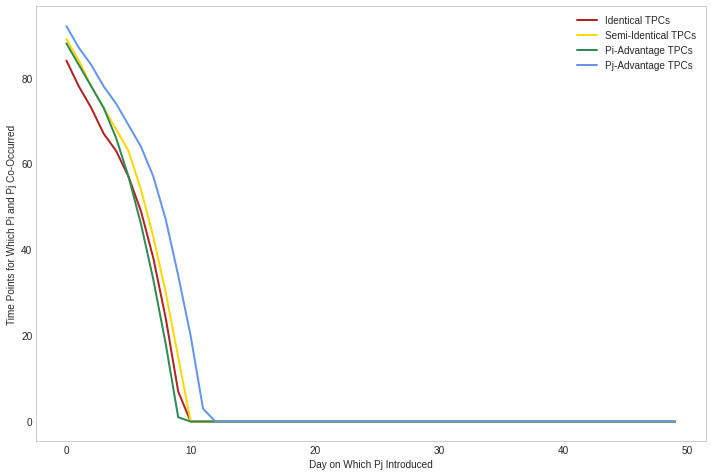

In [202]:
# Requisite dfs:
    # ClimateChange_Det
    # Bats_Det

plt.plot(ClimateChange_Det.iloc[:,0], linewidth = 2, color = 'firebrick')
plt.plot(ClimateChange_Det.iloc[:,1], linewidth = 2, color = 'gold')
plt.plot(ClimateChange_Det.iloc[:,2], linewidth = 2, color = 'seagreen')
plt.plot(ClimateChange_Det.iloc[:,3], linewidth = 2, color = 'cornflowerblue')
plt.xlabel('Day on Which Pj Introduced')
plt.ylabel('Time Points for Which Pi and Pj Co-Occurred')
plt.grid(False)
plt.legend(['Identical TPCs','Semi-Identical TPCs', 'Pi-Advantage TPCs', 'Pj-Advantage TPCs'], loc = 1)
plt.rcParams['figure.figsize'] = [12, 8]

# This tells us what we want to know, but everything after the 15th introduction day is uninformative, so let's get rid of that... 

Text(0.5, 0, 'Day on Which Pj Introduced')

Text(0, 0.5, 'Time Points for Which Pi and Pj Co-Occurred')

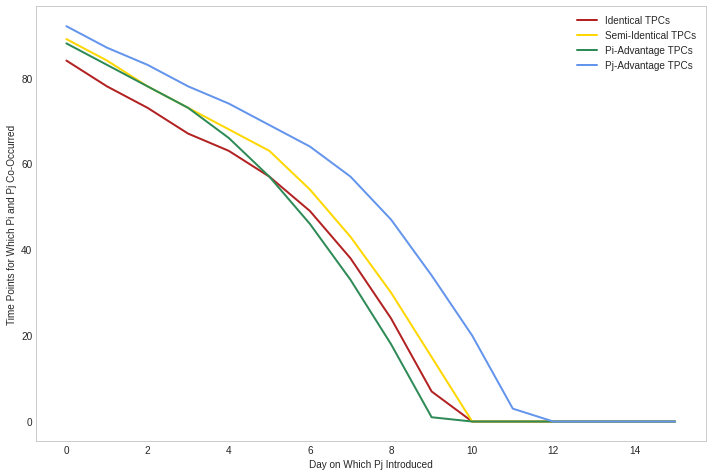

In [203]:
plt.plot(ClimateChange_Det.iloc[:16,0], linewidth = 2, color = 'firebrick')
plt.plot(ClimateChange_Det.iloc[:16,1], linewidth = 2, color = 'gold')
plt.plot(ClimateChange_Det.iloc[:16,2], linewidth = 2, color = 'seagreen')
plt.plot(ClimateChange_Det.iloc[:16,3], linewidth = 2, color = 'cornflowerblue')
plt.xlabel('Day on Which Pj Introduced')
plt.ylabel('Time Points for Which Pi and Pj Co-Occurred')
plt.grid(False)
plt.legend(['Identical TPCs','Semi-Identical TPCs', 'Pi-Advantage TPCs', 'Pj-Advantage TPCs'], loc = 1)
plt.rcParams['figure.figsize'] = [12, 8]

### Interpretation: 
Great! This shows us that in the absence of stochasticity, $P_i$ and $P_j$ can co-occur for a maximum of 92 time steps, or, 9.2 days. This will act as our baseline, against which we'll compare our stochastic simulations. We can also see that our thermal arrangement wherein the secondary parasite, $P_j$, has the thermal advantage over the primary parasite, $P_i$, seems to produce the longest periods of co-occurrence, while our thermal arrangements wherein $P_i$ and $P_j$ respond identically to the temperature of the system, and wherein $P_i$ has a thermal advantge over $P_j$ seem to produce the shortest periods of co-occurrence. These outcomes make sense given that $P_i$ has the inherent advantage of being introduced to the system first, which allows its population to grow before the introduction of $P_j$, making the invasion of $P_j$ more difficult, and the viability and longevity of co-occurrence less probable and shorter.  

## Deterministic vs. Demographically Stochastic Simulations

Text(0.5, 0, 'Day on Which Pj Introduced')

Text(0, 0.5, 'Time Points for Which Pi and Pj Co-Occurred')

([<matplotlib.axis.XTick at 0x7efedcdea9a0>,
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '5.0'),
  Text(6, 0, '6.0'),
  Text(7, 0, '7.0'),
  Text(8, 0, '8.0'),
  Text(9, 0, '9.0'),
  Text(10, 0, '10.0'),
  Text(11, 0, '11.0'),
  Text(12, 0, '12.0'),
  Text(13, 0, '13.0'),
  Text(14, 0, '14.0'),
  Text(15, 0, '15.0'),
  Text(16, 0, '16.0'),
  Text(17, 0, '17.0'),
  Text(18, 0, '18.0'),
  Text(19, 0, '19.0'),
  Text(20, 0, '20.0')])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '5.0'),
  Text(6, 0, '6.0'),
  Text(7, 0, '7.0'),
  Text(8, 0, '8.0'),
  Text(9, 0, '9.0'),
  Text(10, 0, '10.0'),
  Text(11, 0, '11.0'),
  Text(12, 0, '12.0'),
  Text(13, 0, '13.0'),
  Text(14, 0, '14.0'),
  Text(15, 0, '15.0'),
  Text(16, 0, '16.0'),
  Text(17, 0, '17.0'),
  Text(18, 0, '18.0'),
  Text(19, 0, '19.0'),
  Text(20, 0, '20.0')])

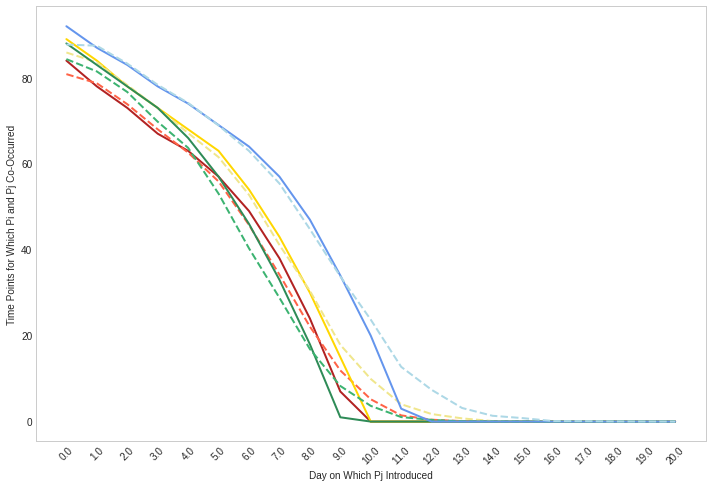

In [204]:
plt.plot(ClimateChange_Det.iloc[:21,0], linewidth = 2, color = 'firebrick')
plt.plot(CC_SD10.iloc[:21,0], linewidth = 2, color = 'tomato', linestyle = 'dashed')
plt.plot(ClimateChange_Det.iloc[:21,1], linewidth = 2, color = 'gold')
plt.plot(CC_SD10.iloc[:21,1], linewidth = 2, color = 'khaki', linestyle = 'dashed')
plt.plot(ClimateChange_Det.iloc[:21,2], linewidth = 2, color = 'seagreen')
plt.plot(CC_SD10.iloc[:21,2], linewidth = 2, color = 'mediumseagreen', linestyle = 'dashed')
plt.plot(ClimateChange_Det.iloc[:21,3], linewidth = 2, color = 'cornflowerblue')
plt.plot(CC_SD10.iloc[:21,3], linewidth = 2, color = 'lightblue', linestyle = 'dashed')
plt.xlabel('Day on Which Pj Introduced')
plt.ylabel('Time Points for Which Pi and Pj Co-Occurred')
plt.grid(False)
x = np.linspace(start=0, stop=20, num=21); 
default_x_ticks = range(len(x));
plt.xticks(default_x_ticks, x)
plt.xticks(rotation=45)
plt.rcParams['figure.figsize'] = [12, 8]

**In the above plot:**  
- <span style='color:firebrick'>Red</span> lines denote identical TPCs  
    - Dashed lines denote demographically stochastic simulations.   
- <span style='color:gold'>Yellow</span> lines denote semi-identical TPCs  
- <span style='color:seagreen'>Green</span> lines denote Pi-Advantage TPCs  
- <span style='color:cornflowerblue'>Blue</span> lines denote Pj-Advantage TPCs  

P.S. I would have included all this in a legend, but it was getting a bit messy/couldn't figure out a nice way to do so; I'd improve that in the future.  

### Interpretation:
From this plot, we can see that while demographic stochasticity may alter the tendency for $P_i$ and $P_j$ to co-occur, it does not reuslt in significantly different periods of co-occurrence compared to thosee produced by deterministic simulations. We can also see, as we saw above, that our thermal arrangement wherein the secondary parasite, $P_j$, has the thermal advantage over the primary parasite, $P_i$, produces the longest periods of co-occurrence. 

## Low Average Temperature Environment 🐟

Text(0.5, 1.0, 'Within-Host Parasite Co-Occurrence, Low Average Temperature Environment, Magnitude of Thermal Disturbance = Small')

Text(0.5, 0, 'Day on Which Pj Introduced')

Text(0, 0.5, 'Time Points for Which Pi and Pj Co-Occurred')

([<matplotlib.axis.XTick at 0x7efedcbd1f10>,
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '5.0'),
  Text(6, 0, '6.0'),
  Text(7, 0, '7.0'),
  Text(8, 0, '8.0'),
  Text(9, 0, '9.0'),
  Text(10, 0, '10.0'),
  Text(11, 0, '11.0'),
  Text(12, 0, '12.0'),
  Text(13, 0, '13.0'),
  Text(14, 0, '14.0'),
  Text(15, 0, '15.0'),
  Text(16, 0, '16.0'),
  Text(17, 0, '17.0'),
  Text(18, 0, '18.0'),
  Text(19, 0, '19.0'),
  Text(20, 0, '20.0')])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '5.0'),
  Text(6, 0, '6.0'),
  Text(7, 0, '7.0'),
  Text(8, 0, '8.0'),
  Text(9, 0, '9.0'),
  Text(10, 0, '10.0'),
  Text(11, 0, '11.0'),
  Text(12, 0, '12.0'),
  Text(13, 0, '13.0'),
  Text(14, 0, '14.0'),
  Text(15, 0, '15.0'),
  Text(16, 0, '16.0'),
  Text(17, 0, '17.0'),
  Text(18, 0, '18.0'),
  Text(19, 0, '19.0'),
  Text(20, 0, '20.0')])

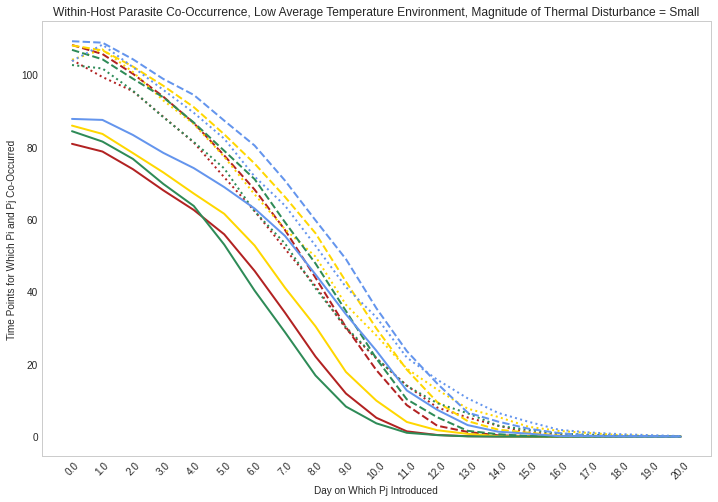

In [205]:
# Requisite dfs:
    # CC_SD10
    # CC_SD20
    
plt.plot(CC_SD10.iloc[:21,0], linewidth = 2, color = 'firebrick', linestyle = 'solid')
plt.plot(CC_SD10.iloc[:21,4], linewidth = 2, color = 'firebrick', linestyle = 'dashed')
plt.plot(CC_SD10.iloc[:21,8], linewidth = 2, color = 'firebrick', linestyle = 'dotted')
plt.plot(CC_SD10.iloc[:21,1], linewidth = 2, color = 'gold', linestyle = 'solid')
plt.plot(CC_SD10.iloc[:21,5], linewidth = 2, color = 'gold', linestyle = 'dashed')
plt.plot(CC_SD10.iloc[:21,9], linewidth = 2, color = 'gold', linestyle = 'dotted')
plt.plot(CC_SD10.iloc[:21,2], linewidth = 2, color = 'seagreen', linestyle = 'solid')
plt.plot(CC_SD10.iloc[:21,6], linewidth = 2, color = 'seagreen', linestyle = 'dashed')
plt.plot(CC_SD10.iloc[:21,10], linewidth = 2, color = 'seagreen', linestyle = 'dotted')
plt.plot(CC_SD10.iloc[:21,3], linewidth = 2, color = 'cornflowerblue', linestyle = 'solid')
plt.plot(CC_SD10.iloc[:21,7], linewidth = 2, color = 'cornflowerblue', linestyle = 'dashed')
plt.plot(CC_SD10.iloc[:21,11], linewidth = 2, color = 'cornflowerblue', linestyle = 'dotted')
plt.title('Within-Host Parasite Co-Occurrence, Low Average Temperature Environment, Magnitude of Thermal Disturbance = Small')
plt.xlabel('Day on Which Pj Introduced')
plt.ylabel('Time Points for Which Pi and Pj Co-Occurred')
plt.grid(False)
x = np.linspace(start=0, stop=20, num=21); 
default_x_ticks = range(len(x));
plt.xticks(default_x_ticks, x)
plt.xticks(rotation=45)
plt.rcParams['figure.figsize'] = [12, 8]

Text(0.5, 1.0, 'Within-Host Parasite Co-Occurrence, Low Average Temperature Environment, Magnitude of Thermal Disturbance = Large')

Text(0.5, 0, 'Day on Which Pj Introduced')

Text(0, 0.5, 'Time Points for Which Pi and Pj Co-Occurred')

([<matplotlib.axis.XTick at 0x7efedcb4e490>,
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '5.0'),
  Text(6, 0, '6.0'),
  Text(7, 0, '7.0'),
  Text(8, 0, '8.0'),
  Text(9, 0, '9.0'),
  Text(10, 0, '10.0'),
  Text(11, 0, '11.0'),
  Text(12, 0, '12.0'),
  Text(13, 0, '13.0'),
  Text(14, 0, '14.0'),
  Text(15, 0, '15.0'),
  Text(16, 0, '16.0'),
  Text(17, 0, '17.0'),
  Text(18, 0, '18.0'),
  Text(19, 0, '19.0'),
  Text(20, 0, '20.0')])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '5.0'),
  Text(6, 0, '6.0'),
  Text(7, 0, '7.0'),
  Text(8, 0, '8.0'),
  Text(9, 0, '9.0'),
  Text(10, 0, '10.0'),
  Text(11, 0, '11.0'),
  Text(12, 0, '12.0'),
  Text(13, 0, '13.0'),
  Text(14, 0, '14.0'),
  Text(15, 0, '15.0'),
  Text(16, 0, '16.0'),
  Text(17, 0, '17.0'),
  Text(18, 0, '18.0'),
  Text(19, 0, '19.0'),
  Text(20, 0, '20.0')])

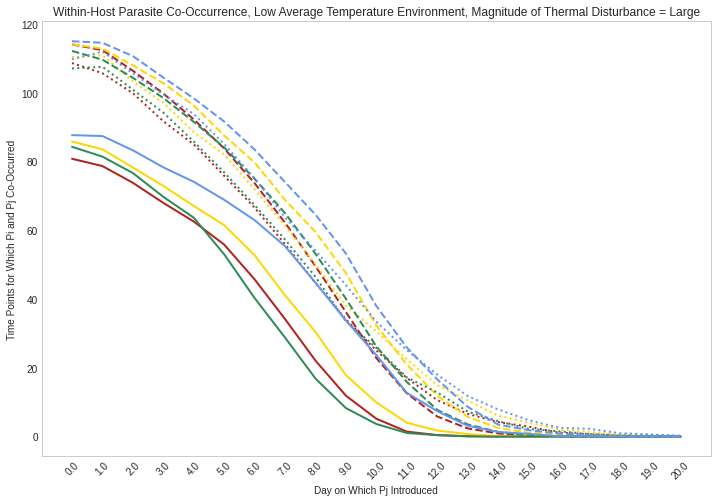

In [206]:
plt.plot(CC_SD20.iloc[:21,0], linewidth = 2, color = 'firebrick', linestyle = 'solid')
plt.plot(CC_SD20.iloc[:21,4], linewidth = 2, color = 'firebrick', linestyle = 'dashed')
plt.plot(CC_SD20.iloc[:21,8], linewidth = 2, color = 'firebrick', linestyle = 'dotted')
plt.plot(CC_SD20.iloc[:21,1], linewidth = 2, color = 'gold', linestyle = 'solid')
plt.plot(CC_SD20.iloc[:21,5], linewidth = 2, color = 'gold', linestyle = 'dashed')
plt.plot(CC_SD20.iloc[:21,9], linewidth = 2, color = 'gold', linestyle = 'dotted')
plt.plot(CC_SD20.iloc[:21,2], linewidth = 2, color = 'seagreen', linestyle = 'solid')
plt.plot(CC_SD20.iloc[:21,6], linewidth = 2, color = 'seagreen', linestyle = 'dashed')
plt.plot(CC_SD20.iloc[:21,10], linewidth = 2, color = 'seagreen', linestyle = 'dotted')
plt.plot(CC_SD20.iloc[:21,3], linewidth = 2, color = 'cornflowerblue', linestyle = 'solid')
plt.plot(CC_SD20.iloc[:21,7], linewidth = 2, color = 'cornflowerblue', linestyle = 'dashed')
plt.plot(CC_SD20.iloc[:21,11], linewidth = 2, color = 'cornflowerblue', linestyle = 'dotted')
plt.title('Within-Host Parasite Co-Occurrence, Low Average Temperature Environment, Magnitude of Thermal Disturbance = Large')
plt.xlabel('Day on Which Pj Introduced')
plt.ylabel('Time Points for Which Pi and Pj Co-Occurred')
plt.grid(False)
x = np.linspace(start=0, stop=20, num=21); 
default_x_ticks = range(len(x));
plt.xticks(default_x_ticks, x)
plt.xticks(rotation=45)
plt.rcParams['figure.figsize'] = [12, 8]

**In the above plot:**  
- <span style='color:firebrick'>Red</span> lines denote identical TPCs  
    - Solid lines denote demographically stochastic simulations.  
    - Dashed lines denote environmentally stochastic simulations.  
    - Dotted lines denote demographically and environmentally stochastic simulations.  
- <span style='color:gold'>Yellow</span> lines denote semi-identical TPCs  
- <span style='color:seagreen'>Green</span> lines denote Pi-Advantage TPCs  
- <span style='color:cornflowerblue'>Blue</span> lines denote Pj-Advantage TPCs   

### Interpretation:  
These plots shows us that where demographic stochasticity seems to have little influence on the viability and maintenace of co-occurrence between $P_i$ and $P_j$, envionmental stochasticity seems to promote both the viability and maintenance of co-occurrence. We see that in our simulations that include environmental stochasticity, the likelihood of co-occurrence at later introduction points is higher and periods of co-occurrence tend to be longer than in deterministic or demographically stochastic simulations.  

We also see that when the magnitude of thermal disturbance is larger, this effect is exacerbated, implying that as our climate continues to change and becomes more variable as a consequence, we may see increased co-occurrence between parasite within hosts, increasing within-host parasite diversity. Let's take a closer look at this effect in the next two plots.    

Finally, we see, as shown in our previous two plots, that our thermal arrangement wherein the secondary parasite, $P_j$, has the thermal advantage over the primary parasite, $P_i$, produces the longest periods of co-occurrence. 

Text(0.5, 1.0, 'Within-Host Parasite Co-Occurrence, Low Average Temperature Environment, Identical Thermal Arrangement')

Text(0.5, 0, 'Day on Which Pj Introduced')

Text(0, 0.5, 'Time Points for Which Pi and Pj Co-Occurred')

([<matplotlib.axis.XTick at 0x7efedcca2790>,
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '5.0'),
  Text(6, 0, '6.0'),
  Text(7, 0, '7.0'),
  Text(8, 0, '8.0'),
  Text(9, 0, '9.0'),
  Text(10, 0, '10.0'),
  Text(11, 0, '11.0'),
  Text(12, 0, '12.0'),
  Text(13, 0, '13.0'),
  Text(14, 0, '14.0'),
  Text(15, 0, '15.0'),
  Text(16, 0, '16.0'),
  Text(17, 0, '17.0'),
  Text(18, 0, '18.0'),
  Text(19, 0, '19.0'),
  Text(20, 0, '20.0')])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '5.0'),
  Text(6, 0, '6.0'),
  Text(7, 0, '7.0'),
  Text(8, 0, '8.0'),
  Text(9, 0, '9.0'),
  Text(10, 0, '10.0'),
  Text(11, 0, '11.0'),
  Text(12, 0, '12.0'),
  Text(13, 0, '13.0'),
  Text(14, 0, '14.0'),
  Text(15, 0, '15.0'),
  Text(16, 0, '16.0'),
  Text(17, 0, '17.0'),
  Text(18, 0, '18.0'),
  Text(19, 0, '19.0'),
  Text(20, 0, '20.0')])

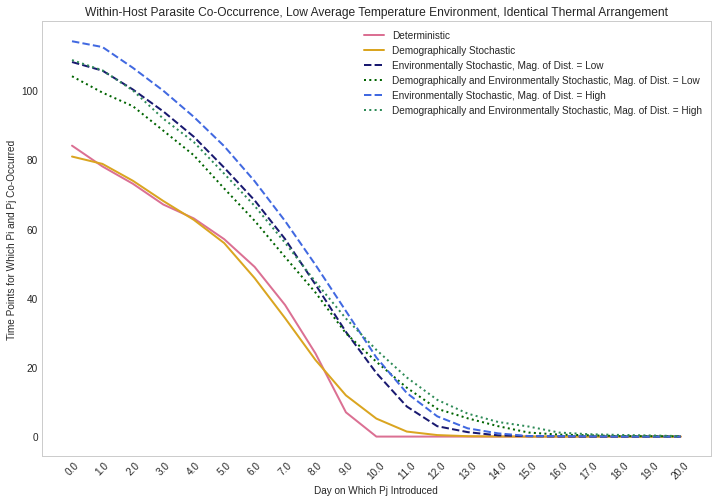

In [207]:
# Identical TPCs
plt.plot(ClimateChange_Det.iloc[:21,0], linewidth = 2, color = 'palevioletred', linestyle = 'solid') # Det
plt.plot(CC_SD10.iloc[:21,0], linewidth = 2, color = 'goldenrod', linestyle = 'solid') # Dem
plt.plot(CC_SD10.iloc[:21,4], linewidth = 2, color = 'midnightblue', linestyle = 'dashed') # Env, SD = 10
plt.plot(CC_SD10.iloc[:21,8], linewidth = 2, color = 'darkgreen', linestyle = 'dotted') # DemEnv, SD = 10
plt.plot(CC_SD20.iloc[:21,4], linewidth = 2, color = 'royalblue', linestyle = 'dashed') # Env, SD = 20
plt.plot(CC_SD20.iloc[:21,8], linewidth = 2, color = 'seagreen', linestyle = 'dotted') # DemEnv, SD = 20
plt.title('Within-Host Parasite Co-Occurrence, Low Average Temperature Environment, Identical Thermal Arrangement')
plt.xlabel('Day on Which Pj Introduced')
plt.ylabel('Time Points for Which Pi and Pj Co-Occurred')
plt.grid(False)
plt.legend(['Deterministic','Demographically Stochastic', 'Environmentally Stochastic, Mag. of Dist. = Low', 
            'Demographically and Environmentally Stochastic, Mag. of Dist. = Low', 'Environmentally Stochastic, Mag. of Dist. = High', 
            'Demographically and Environmentally Stochastic, Mag. of Dist. = High'], loc = 1)
x = np.linspace(start=0, stop=20, num=21); 
default_x_ticks = range(len(x));
plt.xticks(default_x_ticks, x)
plt.xticks(rotation=45)
plt.rcParams['figure.figsize'] = [12, 8]

Text(0.5, 1.0, 'Within-Host Parasite Co-Occurrence, Low Average Temperature Environment, Pj-Advantage Thermal Arrangement')

Text(0.5, 0, 'Day on Which Pj Introduced')

Text(0, 0.5, 'Time Points for Which Pi and Pj Co-Occurred')

([<matplotlib.axis.XTick at 0x7efe8a5991f0>,
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '5.0'),
  Text(6, 0, '6.0'),
  Text(7, 0, '7.0'),
  Text(8, 0, '8.0'),
  Text(9, 0, '9.0'),
  Text(10, 0, '10.0'),
  Text(11, 0, '11.0'),
  Text(12, 0, '12.0'),
  Text(13, 0, '13.0'),
  Text(14, 0, '14.0'),
  Text(15, 0, '15.0'),
  Text(16, 0, '16.0'),
  Text(17, 0, '17.0'),
  Text(18, 0, '18.0'),
  Text(19, 0, '19.0'),
  Text(20, 0, '20.0')])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '5.0'),
  Text(6, 0, '6.0'),
  Text(7, 0, '7.0'),
  Text(8, 0, '8.0'),
  Text(9, 0, '9.0'),
  Text(10, 0, '10.0'),
  Text(11, 0, '11.0'),
  Text(12, 0, '12.0'),
  Text(13, 0, '13.0'),
  Text(14, 0, '14.0'),
  Text(15, 0, '15.0'),
  Text(16, 0, '16.0'),
  Text(17, 0, '17.0'),
  Text(18, 0, '18.0'),
  Text(19, 0, '19.0'),
  Text(20, 0, '20.0')])

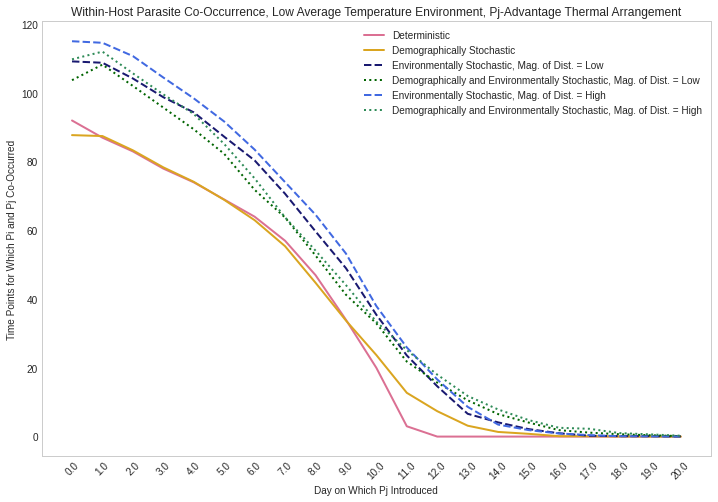

In [208]:
# Pj-Advantage TPCs
plt.plot(ClimateChange_Det.iloc[:21,3], linewidth = 2, color = 'palevioletred', linestyle = 'solid') # Det
plt.plot(CC_SD10.iloc[:21,3], linewidth = 2, color = 'goldenrod', linestyle = 'solid') # Dem
plt.plot(CC_SD10.iloc[:21,7], linewidth = 2, color = 'midnightblue', linestyle = 'dashed') # Env, SD = 10
plt.plot(CC_SD10.iloc[:21,11], linewidth = 2, color = 'darkgreen', linestyle = 'dotted') # DemEnv, SD = 10
plt.plot(CC_SD20.iloc[:21,7], linewidth = 2, color = 'royalblue', linestyle = 'dashed') # Env, SD = 20
plt.plot(CC_SD20.iloc[:21,11], linewidth = 2, color = 'seagreen', linestyle = 'dotted') # DemEnv, SD = 20
plt.title('Within-Host Parasite Co-Occurrence, Low Average Temperature Environment, Pj-Advantage Thermal Arrangement')
plt.xlabel('Day on Which Pj Introduced')
plt.ylabel('Time Points for Which Pi and Pj Co-Occurred')
plt.grid(False)
plt.legend(['Deterministic','Demographically Stochastic', 'Environmentally Stochastic, Mag. of Dist. = Low', 
            'Demographically and Environmentally Stochastic, Mag. of Dist. = Low', 'Environmentally Stochastic, Mag. of Dist. = High', 
            'Demographically and Environmentally Stochastic, Mag. of Dist. = High'], loc = 1)
x = np.linspace(start=0, stop=20, num=21); 
default_x_ticks = range(len(x));
plt.xticks(default_x_ticks, x)
plt.xticks(rotation=45)
plt.rcParams['figure.figsize'] = [12, 8]

## High Average Temperature Environment 🦇  

Now, since we have a few frequencies we're using in our simulation, we'll make four plots, one per thermal arrangement, so we can show comparisons between the deterministic, demographically stochastic, environmentally stochastic, and demographically and environmentally stochastic simulations, when the system experiences a thermal disturbance every 2, 10, and 20 time steps (5 times/day, once/day, once/2 days).  

<AxesSubplot:>

Text(0.5, 1.0, 'Identical Thermal Arrangement')

Text(0.5, 0, 'Day on Which Pj Introduced')

Text(0, 0.5, 'Time Points for Which Pi and Pj Co-Occurred')

([<matplotlib.axis.XTick at 0x7efe820b8730>,
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '5.0'),
  Text(6, 0, '6.0'),
  Text(7, 0, '7.0'),
  Text(8, 0, '8.0'),
  Text(9, 0, '9.0'),
  Text(10, 0, '10.0'),
  Text(11, 0, '11.0'),
  Text(12, 0, '12.0'),
  Text(13, 0, '13.0'),
  Text(14, 0, '14.0'),
  Text(15, 0, '15.0'),
  Text(16, 0, '16.0'),
  Text(17, 0, '17.0'),
  Text(18, 0, '18.0'),
  Text(19, 0, '19.0'),
  Text(20, 0, '20.0')])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '5.0'),
  Text(6, 0, '6.0'),
  Text(7, 0, '7.0'),
  Text(8, 0, '8.0'),
  Text(9, 0, '9.0'),
  Text(10, 0, '10.0'),
  Text(11, 0, '11.0'),
  Text(12, 0, '12.0'),
  Text(13, 0, '13.0'),
  Text(14, 0, '14.0'),
  Text(15, 0, '15.0'),
  Text(16, 0, '16.0'),
  Text(17, 0, '17.0'),
  Text(18, 0, '18.0'),
  Text(19, 0, '19.0'),
  Text(20, 0, '20.0')])

<AxesSubplot:>

Text(0.5, 1.0, 'Semi-Identical Thermal Arrangement')

Text(0.5, 0, 'Day on Which Pj Introduced')

Text(0, 0.5, 'Time Points for Which Pi and Pj Co-Occurred')

([<matplotlib.axis.XTick at 0x7efe81db7f40>,
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '5.0'),
  Text(6, 0, '6.0'),
  Text(7, 0, '7.0'),
  Text(8, 0, '8.0'),
  Text(9, 0, '9.0'),
  Text(10, 0, '10.0'),
  Text(11, 0, '11.0'),
  Text(12, 0, '12.0'),
  Text(13, 0, '13.0'),
  Text(14, 0, '14.0'),
  Text(15, 0, '15.0'),
  Text(16, 0, '16.0'),
  Text(17, 0, '17.0'),
  Text(18, 0, '18.0'),
  Text(19, 0, '19.0'),
  Text(20, 0, '20.0')])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '5.0'),
  Text(6, 0, '6.0'),
  Text(7, 0, '7.0'),
  Text(8, 0, '8.0'),
  Text(9, 0, '9.0'),
  Text(10, 0, '10.0'),
  Text(11, 0, '11.0'),
  Text(12, 0, '12.0'),
  Text(13, 0, '13.0'),
  Text(14, 0, '14.0'),
  Text(15, 0, '15.0'),
  Text(16, 0, '16.0'),
  Text(17, 0, '17.0'),
  Text(18, 0, '18.0'),
  Text(19, 0, '19.0'),
  Text(20, 0, '20.0')])

<AxesSubplot:>

Text(0.5, 1.0, 'Pi-Advantage Thermal Arrangement')

Text(0.5, 0, 'Day on Which Pj Introduced')

Text(0, 0.5, 'Time Points for Which Pi and Pj Co-Occurred')

([<matplotlib.axis.XTick at 0x7efe81d2cf70>,
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '5.0'),
  Text(6, 0, '6.0'),
  Text(7, 0, '7.0'),
  Text(8, 0, '8.0'),
  Text(9, 0, '9.0'),
  Text(10, 0, '10.0'),
  Text(11, 0, '11.0'),
  Text(12, 0, '12.0'),
  Text(13, 0, '13.0'),
  Text(14, 0, '14.0'),
  Text(15, 0, '15.0'),
  Text(16, 0, '16.0'),
  Text(17, 0, '17.0'),
  Text(18, 0, '18.0'),
  Text(19, 0, '19.0'),
  Text(20, 0, '20.0')])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '5.0'),
  Text(6, 0, '6.0'),
  Text(7, 0, '7.0'),
  Text(8, 0, '8.0'),
  Text(9, 0, '9.0'),
  Text(10, 0, '10.0'),
  Text(11, 0, '11.0'),
  Text(12, 0, '12.0'),
  Text(13, 0, '13.0'),
  Text(14, 0, '14.0'),
  Text(15, 0, '15.0'),
  Text(16, 0, '16.0'),
  Text(17, 0, '17.0'),
  Text(18, 0, '18.0'),
  Text(19, 0, '19.0'),
  Text(20, 0, '20.0')])

<AxesSubplot:>

Text(0.5, 1.0, 'Pj-Advantage Thermal Arrangement')

Text(0.5, 0, 'Day on Which Pj Introduced')

Text(0, 0.5, 'Time Points for Which Pi and Pj Co-Occurred')

([<matplotlib.axis.XTick at 0x7efe81ca4190>,
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '5.0'),
  Text(6, 0, '6.0'),
  Text(7, 0, '7.0'),
  Text(8, 0, '8.0'),
  Text(9, 0, '9.0'),
  Text(10, 0, '10.0'),
  Text(11, 0, '11.0'),
  Text(12, 0, '12.0'),
  Text(13, 0, '13.0'),
  Text(14, 0, '14.0'),
  Text(15, 0, '15.0'),
  Text(16, 0, '16.0'),
  Text(17, 0, '17.0'),
  Text(18, 0, '18.0'),
  Text(19, 0, '19.0'),
  Text(20, 0, '20.0')])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '5.0'),
  Text(6, 0, '6.0'),
  Text(7, 0, '7.0'),
  Text(8, 0, '8.0'),
  Text(9, 0, '9.0'),
  Text(10, 0, '10.0'),
  Text(11, 0, '11.0'),
  Text(12, 0, '12.0'),
  Text(13, 0, '13.0'),
  Text(14, 0, '14.0'),
  Text(15, 0, '15.0'),
  Text(16, 0, '16.0'),
  Text(17, 0, '17.0'),
  Text(18, 0, '18.0'),
  Text(19, 0, '19.0'),
  Text(20, 0, '20.0')])

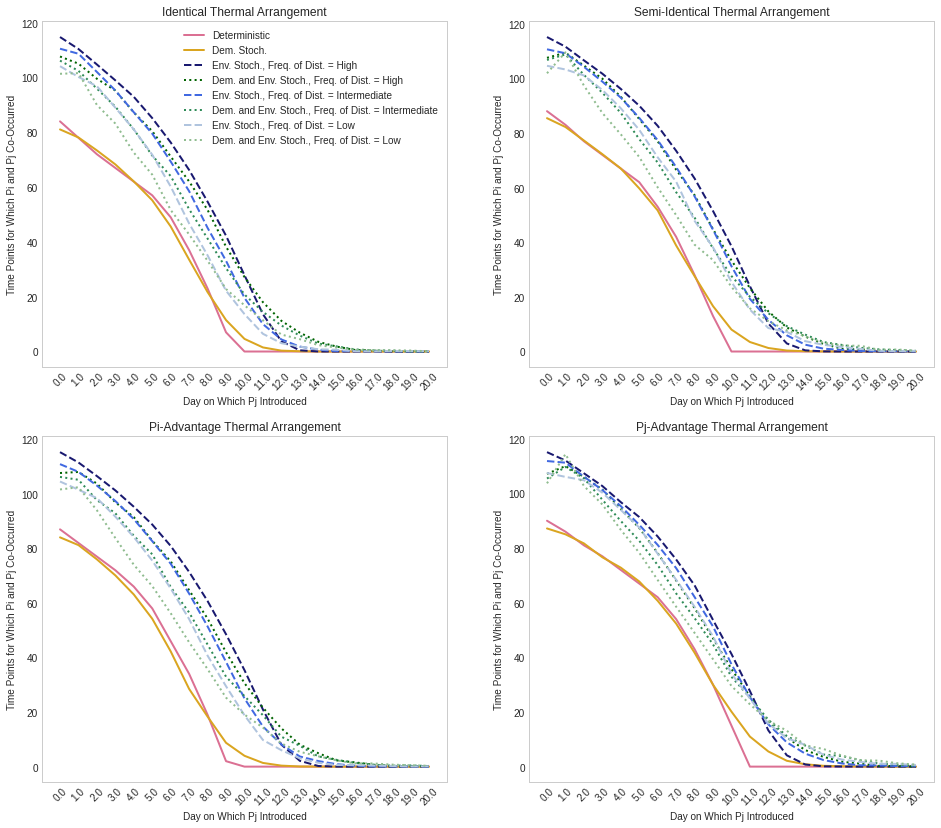

In [213]:
xs = np.linspace(-1, 1)
plt.rcParams['figure.figsize'] = [16, 14]
# Identical TPCs
plt.subplot(2,2,1)
plt.plot(Bats_Det.iloc[:21,0], linewidth = 2, color = 'palevioletred', linestyle = 'solid') # Det
plt.plot(B_2.iloc[:21,0], linewidth = 2, color = 'goldenrod', linestyle = 'solid') # Dem
plt.plot(B_2.iloc[:21,4], linewidth = 2, color = 'midnightblue', linestyle = 'dashed') # Env, Each = 2
plt.plot(B_2.iloc[:21,8], linewidth = 2, color = 'darkgreen', linestyle = 'dotted') # DemEnv, Each = 2
plt.plot(B_10.iloc[:21,4], linewidth = 2, color = 'royalblue', linestyle = 'dashed') # Env, Each = 10
plt.plot(B_10.iloc[:21,8], linewidth = 2, color = 'seagreen', linestyle = 'dotted') # DemEnv, Each = 10
plt.plot(B_20.iloc[:21,4], linewidth = 2, color = 'lightsteelblue', linestyle = 'dashed') # Env, Each = 20
plt.plot(B_20.iloc[:21,8], linewidth = 2, color = 'darkseagreen', linestyle = 'dotted') # DemEnv, Each = 20
plt.title('Identical Thermal Arrangement')
plt.xlabel('Day on Which Pj Introduced')
plt.ylabel('Time Points for Which Pi and Pj Co-Occurred')
plt.grid(False)
plt.legend(['Deterministic','Dem. Stoch.', 'Env. Stoch., Freq. of Dist. = High', 'Dem. and Env. Stoch., Freq. of Dist. = High', 
            'Env. Stoch., Freq. of Dist. = Intermediate', 'Dem. and Env. Stoch., Freq. of Dist. = Intermediate',
           'Env. Stoch., Freq. of Dist. = Low', 'Dem. and Env. Stoch., Freq. of Dist. = Low'], loc = 1)
plt.xticks(default_x_ticks, x)
plt.xticks(rotation=45)
# Semi-Identical TPCs
plt.subplot(2,2,2)
plt.plot(Bats_Det.iloc[:21,1], linewidth = 2, color = 'palevioletred', linestyle = 'solid') # Det
plt.plot(B_2.iloc[:21,1], linewidth = 2, color = 'goldenrod', linestyle = 'solid') # Dem
plt.plot(B_2.iloc[:21,5], linewidth = 2, color = 'midnightblue', linestyle = 'dashed') # Env, Each = 2
plt.plot(B_2.iloc[:21,9], linewidth = 2, color = 'darkgreen', linestyle = 'dotted') # DemEnv, Each = 2
plt.plot(B_10.iloc[:21,5], linewidth = 2, color = 'royalblue', linestyle = 'dashed') # Env, Each = 10
plt.plot(B_10.iloc[:21,9], linewidth = 2, color = 'seagreen', linestyle = 'dotted') # DemEnv, Each = 10
plt.plot(B_20.iloc[:21,5], linewidth = 2, color = 'lightsteelblue', linestyle = 'dashed') # Env, Each = 20
plt.plot(B_20.iloc[:21,9], linewidth = 2, color = 'darkseagreen', linestyle = 'dotted') # DemEnv, Each = 20
plt.title('Semi-Identical Thermal Arrangement')
plt.xlabel('Day on Which Pj Introduced')
plt.ylabel('Time Points for Which Pi and Pj Co-Occurred')
plt.grid(False) 
plt.xticks(default_x_ticks, x)
plt.xticks(rotation=45)
# Pi-Advantage TPCs
plt.subplot(2,2,3)
plt.plot(Bats_Det.iloc[:21,2], linewidth = 2, color = 'palevioletred', linestyle = 'solid') # Det
plt.plot(B_2.iloc[:21,2], linewidth = 2, color = 'goldenrod', linestyle = 'solid') # Dem
plt.plot(B_2.iloc[:21,6], linewidth = 2, color = 'midnightblue', linestyle = 'dashed') # Env, Each = 2
plt.plot(B_2.iloc[:21,10], linewidth = 2, color = 'darkgreen', linestyle = 'dotted') # DemEnv, Each = 2
plt.plot(B_10.iloc[:21,6], linewidth = 2, color = 'royalblue', linestyle = 'dashed') # Env, Each = 10
plt.plot(B_10.iloc[:21,10], linewidth = 2, color = 'seagreen', linestyle = 'dotted') # DemEnv, Each = 10
plt.plot(B_20.iloc[:21,6], linewidth = 2, color = 'lightsteelblue', linestyle = 'dashed') # Env, Each = 20
plt.plot(B_20.iloc[:21,10], linewidth = 2, color = 'darkseagreen', linestyle = 'dotted') # DemEnv, Each = 20
plt.title('Pi-Advantage Thermal Arrangement')
plt.xlabel('Day on Which Pj Introduced')
plt.ylabel('Time Points for Which Pi and Pj Co-Occurred')
plt.grid(False)
plt.xticks(default_x_ticks, x)
plt.xticks(rotation=45)
# Pj-Advantage TPCs
plt.subplot(2,2,4)
plt.plot(Bats_Det.iloc[:21,3], linewidth = 2, color = 'palevioletred', linestyle = 'solid') # Det
plt.plot(B_2.iloc[:21,3], linewidth = 2, color = 'goldenrod', linestyle = 'solid') # Dem
plt.plot(B_2.iloc[:21,7], linewidth = 2, color = 'midnightblue', linestyle = 'dashed') # Env, Each = 2
plt.plot(B_2.iloc[:21,11], linewidth = 2, color = 'darkgreen', linestyle = 'dotted') # DemEnv, Each = 2
plt.plot(B_10.iloc[:21,7], linewidth = 2, color = 'royalblue', linestyle = 'dashed') # Env, Each = 10
plt.plot(B_10.iloc[:21,11], linewidth = 2, color = 'seagreen', linestyle = 'dotted') # DemEnv, Each = 10
plt.plot(B_20.iloc[:21,7], linewidth = 2, color = 'lightsteelblue', linestyle = 'dashed') # Env, Each = 20
plt.plot(B_20.iloc[:21,11], linewidth = 2, color = 'darkseagreen', linestyle = 'dotted') # DemEnv, Each = 20
plt.title('Pj-Advantage Thermal Arrangement')
plt.xlabel('Day on Which Pj Introduced')
plt.ylabel('Time Points for Which Pi and Pj Co-Occurred')
plt.grid(False)
plt.xticks(default_x_ticks, x)
plt.xticks(rotation=45)
plt.show()

### Interpretation:  
These plots show us, as before, that environmental stochasticity seems to promote the viability and longevity of co-occurrence. In particular, we can see that as we increase the frequency of thermal disturbance from once every two days to five times/day, we see increases in the viability and longevity of co-occurrence between $P_i$ and $P_j$, suggesting that environmental variation may be the key to bats' ability to harbour such large communnities of parasites. Additionally, we see, as before, that our thermal arrangement wherein the secondary parasite, $P_j$, has the thermal advantage over the primary parasite, $P_i$, produces the longest periods of co-occurrence.

# **Discussion**  

## Conceptual
While we are beginning to understand the mechanisms that drive spillover events and disease emergence at the between-host level, we have yet to thoroughly investigate the mechanisms that promote parasite diversity and allow parasites to circulate within hosts, creating kindling for the spillover events we observe at the between-host level (Daszak et al. 2000; Daszak et al. 2001; Patz et al. 2004; Plowright et al. 2017; Plowright et al. 2020). Given the predictions of the intermediate disturbance hypothesis, the fact that our climate is becoming more variable, and the additional fact that internal temperature variability is physiological trait unique to a noted reservoir for disease, we set out to investigate the relationship between environmental variability and parasite diversity within-hosts (Vasseur et al. 2014; Calisher et al. 2006; Brook and Dobson 2015; Irving et al. 2021).  

In summary, we found that on average, environmental variability can increase the ability of a secondary parasite to invade a single-parasite system, and can promote longer periods of co-occurrence between the primary and secondary parasites within the host. In our low average temperature environment, meant to represent the thermal conditions within ectotherms subject to rising environmental variability, we found that larger changes in thermal conditions increased the viability and longevity of parasite co-occurrence, suggesting that as our climate continues to change, we should pay special attention to ectotherms’ propensities to support large communities of microparasites. Moving forward, we hope to develop a more detailed characterization of the relationship between the magnitude of thermal change and parasite co-occurrence. In our high average temperature environment, meant to represent the thermal conditions within bats, whose internal temperatures vary rapidly throughout the day, we found that frequent environmental variations increased the viability and longevity of parasite co-occurrence to a greater degree than did less frequent disturbances. These results suggest that, while it has been theorized that variations in internal temperatures may aid in bats’ immune responses, these variations may also allow bats to support uniquely large communities of parasites (Fumagalli et al. 2021; Luo et al. 2021). Further, these results, combined with the frequency with which bats are implicated in zoonotic spillover events suggest that the effects of environmental variability on parasite diversity may scale to the between-host level to have effects on disease emergence. While the impacts of climate change on parasite diversity, and of parasite diversity on global health level remain disputed, these results should give us pause and reason to investigate further ([Carlson et al. 2013](https://www.science.org/doi/full/10.1126/science.342.6162.1041-a); [Carlson et al. 2017](https://www.science.org/doi/pdf/10.1126/sciadv.1602422); [Cizauskas et al. 2017](https://royalsocietypublishing.org/doi/full/10.1098/rsos.160535)).  

## For This Project
There's so much more I would have wanted to do for this project. For example, optimally, I would have wanted to simulate my models and process my resulting time series data to generate my co-occurrece data in Python. However, I wrote my model simulation scripts and my co-occurrence scripts in R, and ran them on a remote server, as they were too computationally intensive to run on my laptop. I've included an examples of how I simulated my deterministic model and got my co-occurrence data from my time series data in my "Methods" section. 

I realise that my largest problem, regardless of language, is writing efficient scripts. The best examples of inefficient code I wrote for this project would be my data importing cell, and my data wrangling cells. I realise that I could have made these steps more efficient by naming my data files more carefully, so I could import them using a for loop. I don't know how, specificially, I could have made my data wrangling cells more efficient; I found myself spending a lot of time looking up how to do pretty basic things, so didn't have the time to streamline my process. In general, I find that writing efficient code comes with experience, so hopefully that will come. 

# **References**  
- Antia, R., Levin, B. R., & May, R. M. (1994). Within-host population dynamics and the evolution and maintenance of microparasite virulence. The American Naturalist, 144(3), 457-472.
- Brook, C. E., & Dobson, A. P. (2015). Bats as ‘special’reservoirs for emerging zoonotic pathogens. Trends in microbiology, 23(3), 172-180.  
- Brulliard, K. (2020, April 3). “The next pandemic is already coming, unless humans change how we interact with wildlife, scientists say” The Washington Post. https://www.washingtonpost.com/science/2020/04/03/coronavirus-wildlife-environment/.  
- Calisher, C. H., Childs, J. E., Field, H. E., Holmes, K. V., & Schountz, T. (2006). Bats: important reservoir hosts of emerging viruses. Clinical microbiology reviews, 19(3), 531-545.  
- Carlson, C. J., Burgio, K. R., Dougherty, E. R., Phillips, A. J., Bueno, V. M., Clements, C. F., ... & Getz, W. M. (2017). Parasite biodiversity faces extinction and redistribution in a changing climate. Science advances, 3(9), e1602422.  
- Carlson, C. J., Cizauskas, C. A., Burgio, K. R., Clements, C. F., & Harris, N. C. (2013). The more parasites, the better?. Science, 342(6162), 1041-1041.  
- Cizauskas, C. A., Carlson, C. J., Burgio, K. R., Clements, C. F., Dougherty, E. R., Harris, N. C., & Phillips, A. J. (2017). Parasite vulnerability to climate change: an evidence-based functional trait approach. Royal Society open science, 4(1), 160535.  
- Connell, J. H. (1978). Diversity in tropical rain forests and coral reefs. Science, 199(4335), 1302-1310.  
- Daszak, P., Cunningham, A. A., & Hyatt, A. D. (2000). Emerging infectious diseases of wildlife--threats to biodiversity and human health. Science, 287(5452), 443-449.  
- Daszak, P., Cunningham, A. A., & Hyatt, A. D. (2001). Anthropogenic environmental change and the emergence of infectious diseases in wildlife. Acta tropica, 78(2), 103-116.  
- Dobson, A., & Carper, R. (1992). Global warming and potential changes in host-parasite and disease-vector relationships.  
- Fumagalli, M. R., Zapperi, S., & La Porta, C. A. (2021). Role of body temperature variations in bat immune response to viral infections. Journal of the Royal Society Interface, 18(180), 20210211.  
- Irving, A. T., Ahn, M., Goh, G., Anderson, D. E., & Wang, L. F. (2021). Lessons from the host defences of bats, a unique viral reservoir. Nature, 589(7842), 363-370.  
- Jones, K. E., Patel, N. G., Levy, M. A., Storeygard, A., Balk, D., Gittleman, J. L., & Daszak, P. (2008). Global trends in emerging infectious diseases. Nature, 451(7181), 990-993.
- Lafferty, K. D. (2009). The ecology of climate change and infectious diseases. Ecology, 90(4), 888-900.  
- Luo, J., Greif, S., Ye, H., Bumrungsri, S., Eitan, O., & Yovel, Y. (2021). Flight rapidly modulates body temperature in freely behaving bats. Animal Biotelemetry, 9(1), 1-10.  
- Melbourne, B. A., & Hastings, A. (2008). Extinction risk depends strongly on factors contributing to stochasticity. Nature, 454(7200), 100-103.  
- Patz, J. A., Daszak, P., Tabor, G. M., Aguirre, A. A., Pearl, M., Epstein, J., ... & Working Group on Land Use Change Disease Emergence. (2004). Unhealthy landscapes: policy recommendations on land use change and infectious disease emergence. Environmental health perspectives, 112(10), 1092-1098.  
- Plowright, R. K., Parrish, C. R., McCallum, H., Hudson, P. J., Ko, A. I., Graham, A. L., & Lloyd-Smith, J. O. (2017). Pathways to zoonotic spillover. Nature Reviews Microbiology, 15(8), 502-510.  
- Plowright, R., Reaser, J., Locke, H., Woodley, S. J., Patz, J. A., Becker, D., ... & Tabor, G. M. (2020). A call to action: Understanding land use-induced zoonotic spillover to protect environmental, animal, and human health.  
- Schoolfield, R. M., Sharpe, P. J. H., & Magnuson, C. E. (1981). Non-linear regression of biological temperature-dependent rate models based on absolute reaction-rate theory. Journal of theoretical biology, 88(4), 719-731.  
- Vasseur, D. A., DeLong, J. P., Gilbert, B., Greig, H. S., Harley, C. D., McCann, K. S., ... & O'Connor, M. I. (2014). Increased temperature variation poses a greater risk to species than climate warming. Proceedings of the Royal Society B: Biological Sciences, 281(1779), 20132612.  

